In [5]:
from os import path
import jieba
import matplotlib.pyplot as plt

In [6]:
from wordcloud import STOPWORDS,WordCloud,ImageColorGenerator

In [7]:
def make_wordcloud(file_path,target_name):
    plt.figure(dpi=400)
    text_from_file_with_apath = open(file_path,'r',encoding='UTF-8').read()
    
    wordlist_after_jieba = jieba.cut(text_from_file_with_apath, cut_all=False)
    
    wl_space_split = " ".join(wordlist_after_jieba)
    
    #print(wl_space_split) #会生成大量分词信息    
    backgroud_Image = plt.imread('rank.jpg')
    
    '''设置词云样式'''
    stopwords = STOPWORDS.copy()
    
    #添加屏蔽词
    stopwords.add("学习")
    stopwords.add("处理")    
    stopwords.add("分析")
    stopwords.add("数据")
    
    #实例，instance
    wc = WordCloud(
        width=1024,
        height=768,
        background_color='white',# 设置背景颜色
        mask=backgroud_Image,# 设置背景图片
        font_path='C:\Windows\Fonts\simkai.ttf',  # 设置中文字体，若是有中文的话，这句代码必须添加，不然会出现方框，不出现汉字
        max_words=600, # 设置最大显示的字数
        stopwords=stopwords,# 设置停用词
        max_font_size=400,# 设置字体最大值
        random_state=50,# 设置有多少种随机生成状态，即有多少种配色方案
    )
    
    wc.generate_from_text(wl_space_split)#开始加载文本
    img_colors = ImageColorGenerator(backgroud_Image)
    wc.recolor(color_func=img_colors)#字体颜色为背景图片的颜色
    plt.imshow(wc)# 显示词云图
    plt.axis('off')# 是否显示x轴、y轴下标
    plt.show()#显示
    
    d = path.curdir    
    wc.to_file(path.join(d, target_name))
    print('生成词云成功!')

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\hasee\AppData\Local\Temp\jieba.cache
Loading model cost 0.592 seconds.
Prefix dict has been built succesfully.


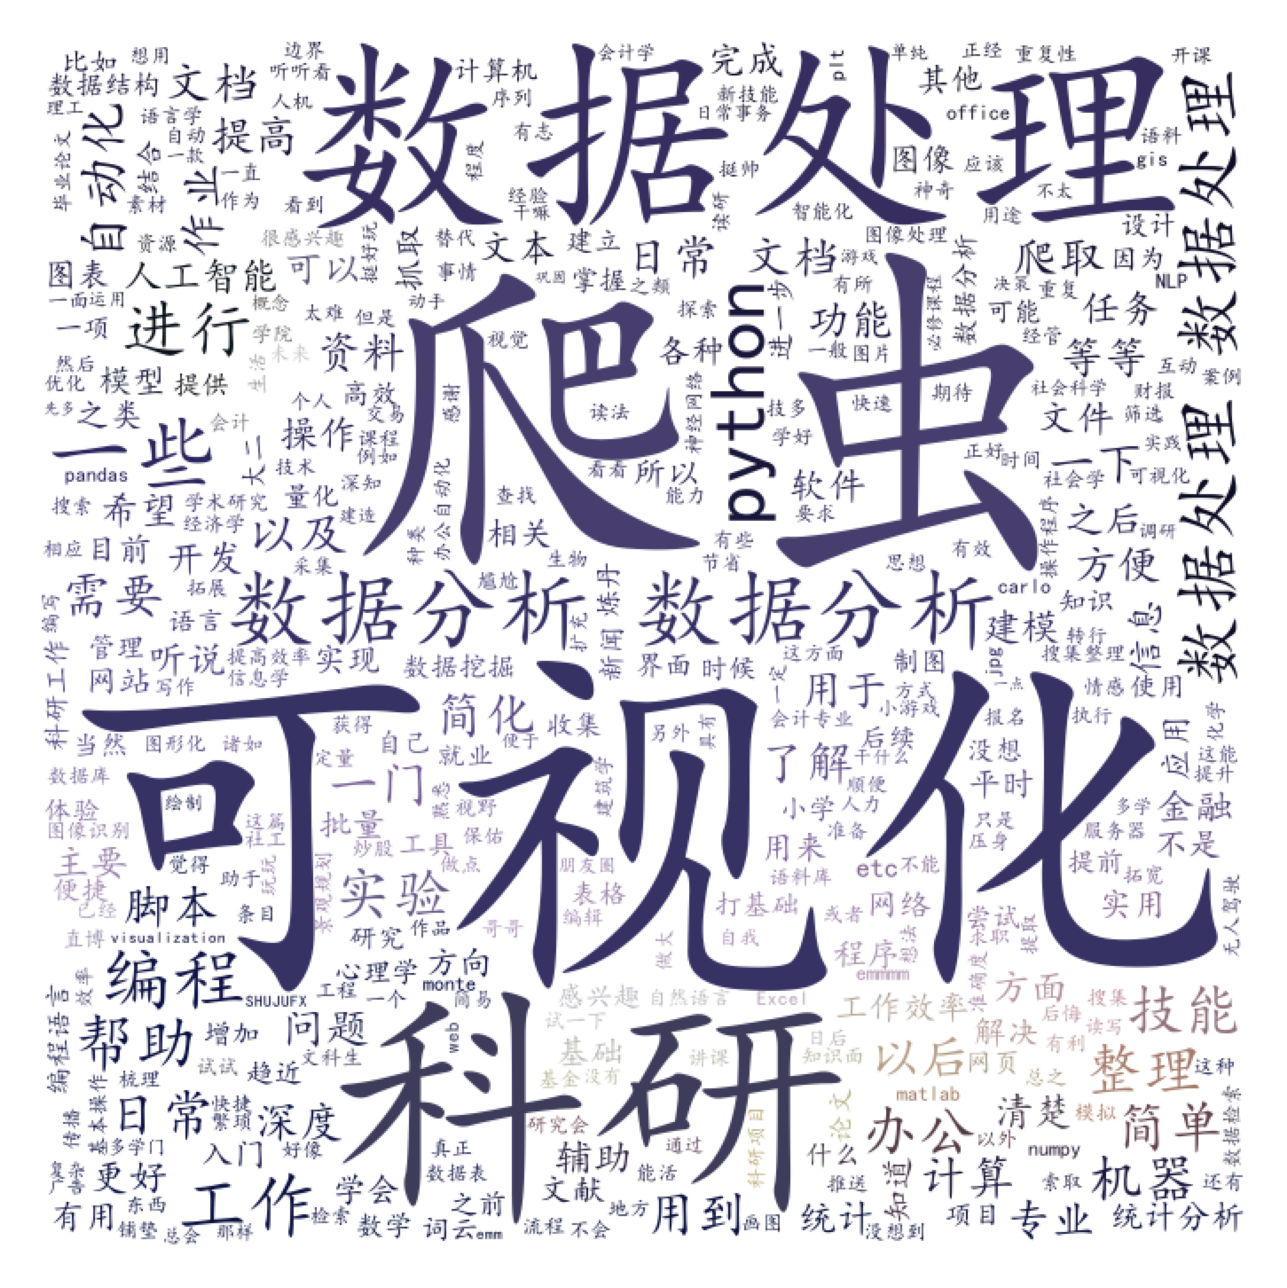

生成词云成功!


In [8]:
make_wordcloud("python.txt","学python最想做什么.jpg")